In [1]:
print('Sentiment Analysis')

Sentiment Analysis


In [2]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,artists
All I Want For Christmas Is You,I don't want a lot for Christmas\nThere is jus...,Mariah Carey
Everybody Knows the Claus,Don't you smell the cookies he's baking\nCan't...,Hanson
Fairytale of New York,Advisory - the following lyrics contain explic...,The Pogues
Feliz Navidad,"Feliz Navidad\nFeliz Navidad\nFeliz Navidad, p...",Jose Feliciano
Happy Xmas (War Is Over),So this is Christmas\nAnd what have you done A...,John Lennon
Have Yourself a Merry Little Christmas,Have yourself a merry little Christmas\nLet yo...,Cat Power
I Saw Mommy Kissing Santa Claus,(kiss sound) Wow! Mommy's kissing Santa Claus!...,The Jackson 5
Jingle Bell Rock,"Jingle bell, jingle bell, jingle bell rock\nJi...",Paul McCartney
Joy To The World,Joy to the world! the Lord is come;\nLet earth...,Earth Wind & Fire
Last Christmas,Last Christmas I gave you my heart\nBut the ve...,Wham!


In [3]:
# Create quick lambda functions to find the polarity and subjectivity of each song
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,artists,polarity,subjectivity
All I Want For Christmas Is You,I don't want a lot for Christmas\nThere is jus...,Mariah Carey,0.404524,0.596071
Everybody Knows the Claus,Don't you smell the cookies he's baking\nCan't...,Hanson,0.009028,0.409722
Fairytale of New York,Advisory - the following lyrics contain explic...,The Pogues,0.203904,0.566923
Feliz Navidad,"Feliz Navidad\nFeliz Navidad\nFeliz Navidad, p...",Jose Feliciano,0.000000,0.000000
Happy Xmas (War Is Over),So this is Christmas\nAnd what have you done A...,John Lennon,0.254500,0.482254
Have Yourself a Merry Little Christmas,Have yourself a merry little Christmas\nLet yo...,Cat Power,0.225417,0.568333
I Saw Mommy Kissing Santa Claus,(kiss sound) Wow! Mommy's kissing Santa Claus!...,The Jackson 5,0.131122,0.350292
Jingle Bell Rock,"Jingle bell, jingle bell, jingle bell rock\nJi...",Paul McCartney,0.428571,0.511905
Joy To The World,Joy to the world! the Lord is come;\nLet earth...,Earth Wind & Fire,0.465385,0.561538
Last Christmas,Last Christmas I gave you my heart\nBut the ve...,Wham!,0.138265,0.329082


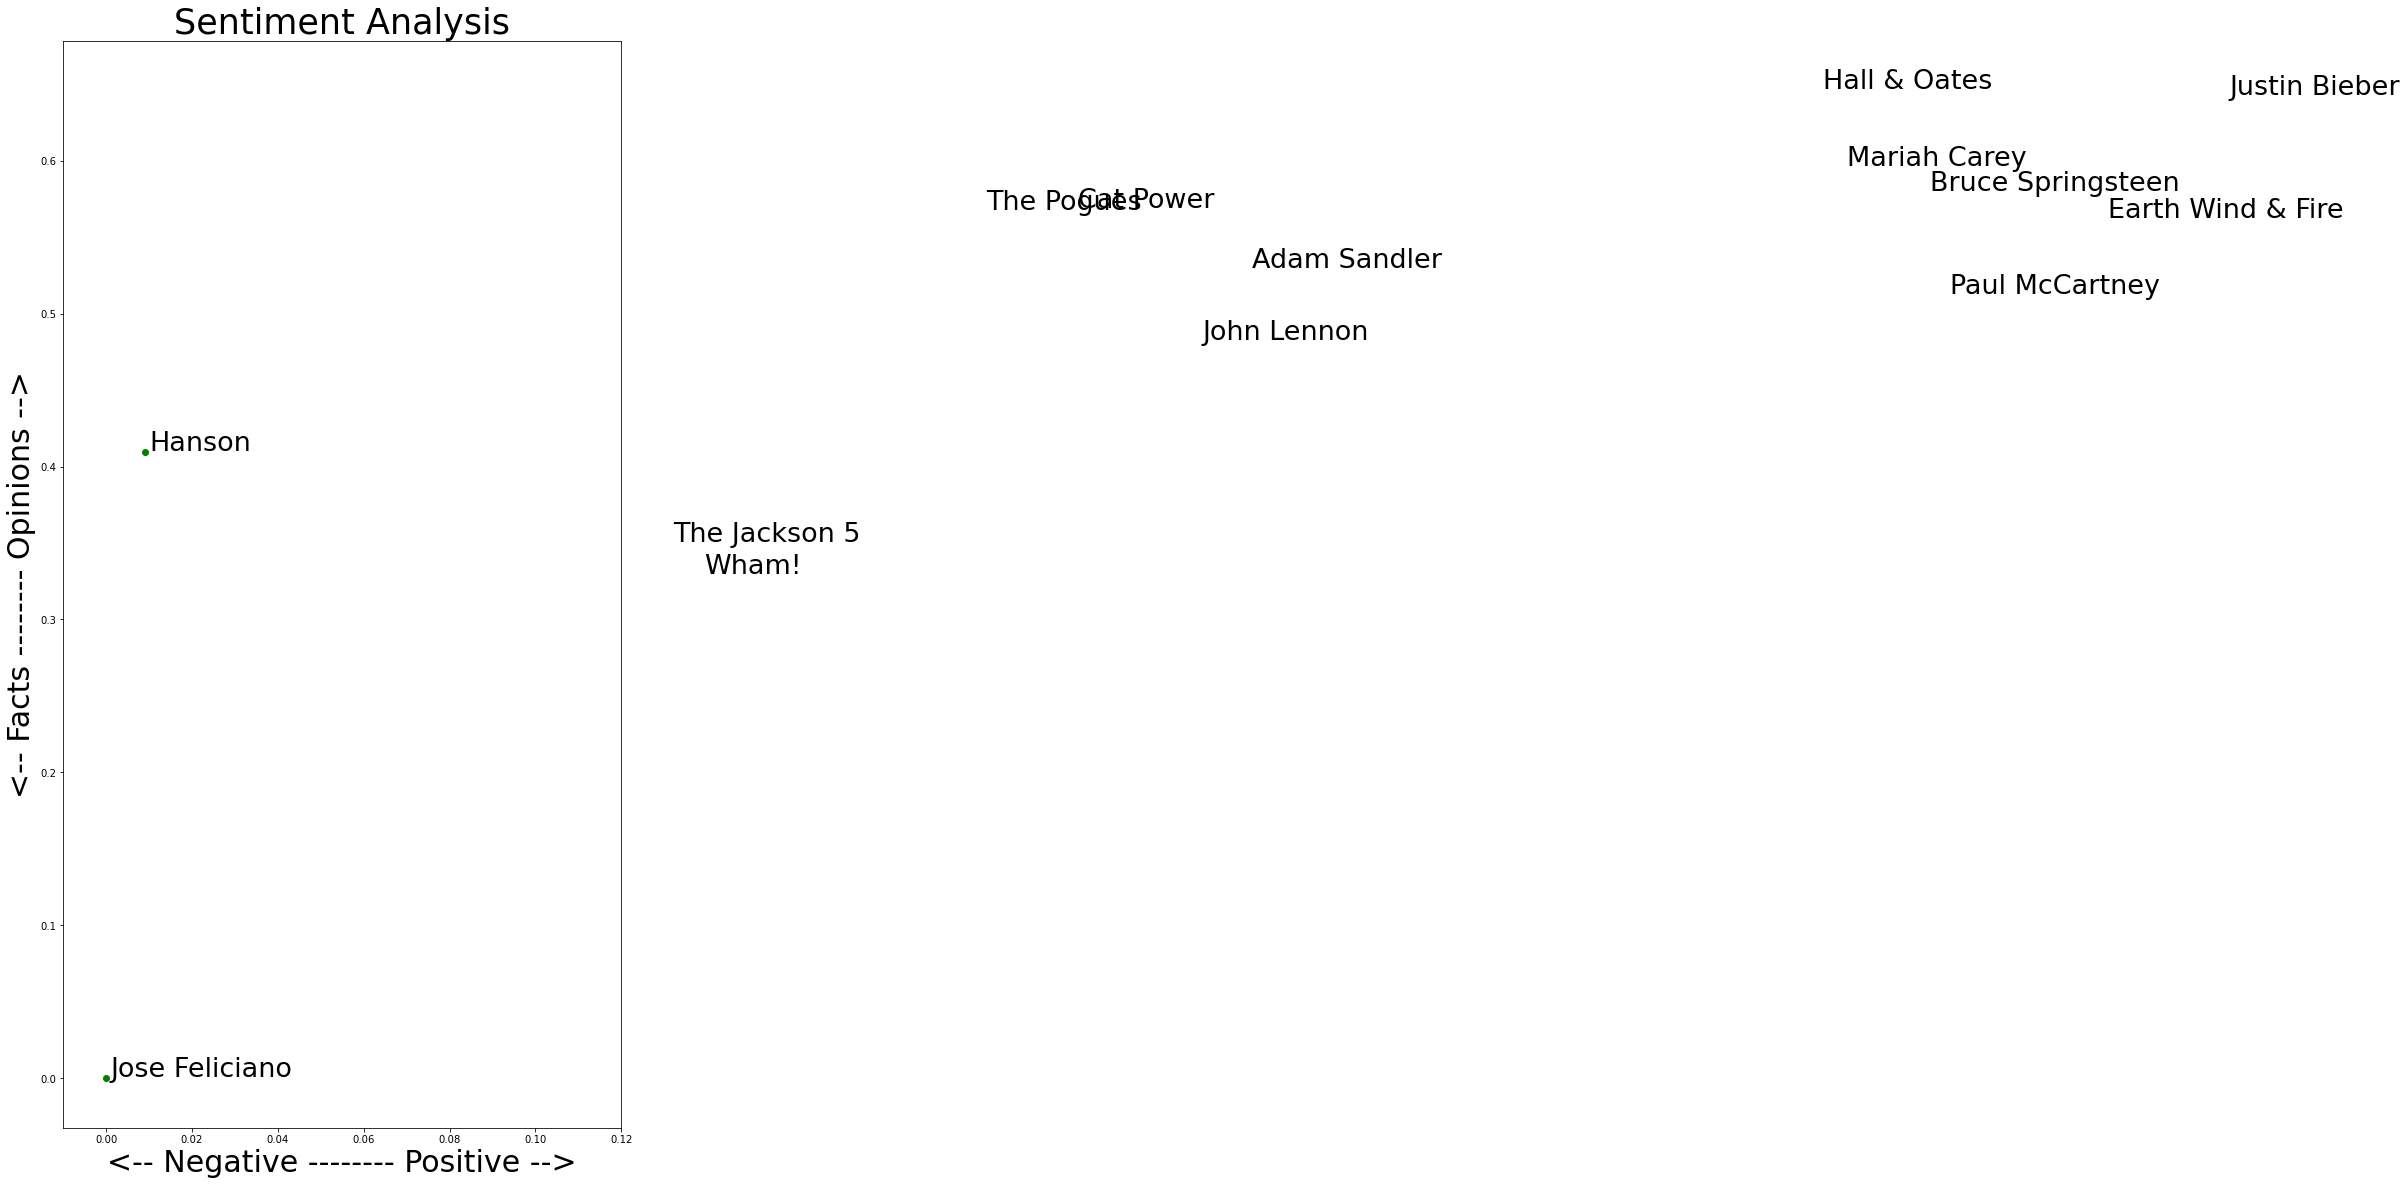

In [4]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 20]

for index, songs in enumerate(data.index):
    x = data.polarity.loc[songs]
    y = data.subjectivity.loc[songs]
    plt.scatter(x, y, color='green')
    plt.text(x+.001, y+.001, data['artists'][index], fontsize=27)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=35)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=30)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=30)

plt.show()

In [6]:
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [7]:
# Let's take a look at our data again
data

,transcript,artists,polarity,subjectivity
All I Want For Christmas Is You,I don't want a lot for Christmas\nThere is jus...,Mariah Carey,0.404524,0.596071
Everybody Knows the Claus,Don't you smell the cookies he's baking\nCan't...,Hanson,0.009028,0.409722
Fairytale of New York,Advisory - the following lyrics contain explic...,The Pogues,0.203904,0.566923
Feliz Navidad,"Feliz Navidad\nFeliz Navidad\nFeliz Navidad, p...",Jose Feliciano,0.000000,0.000000
Happy Xmas (War Is Over),So this is Christmas\nAnd what have you done A...,John Lennon,0.254500,0.482254
Have Yourself a Merry Little Christmas,Have yourself a merry little Christmas\nLet yo...,Cat Power,0.225417,0.568333
I Saw Mommy Kissing Santa Claus,(kiss sound) Wow! Mommy's kissing Santa Claus!...,The Jackson 5,0.131122,0.350292
Jingle Bell Rock,"Jingle bell, jingle bell, jingle bell rock\nJi...",Paul McCartney,0.428571,0.511905
Joy To The World,Joy to the world! the Lord is come;\nLet earth...,Earth Wind & Fire,0.465385,0.561538
Last Christmas,Last Christmas I gave you my heart\nBut the ve...,Wham!,0.138265,0.329082


In [8]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[["I don't want a lot for Christmas\nThere is just one thing I need\nI don't care about the presents\nUnderneath the Christmas tree\nI just want you for my ",
  "own\nMore than you could ever know\nMake my wish come true\nAll I want for Christmas is you I don't want a lot for Christmas\nThere is just one thing I n",
  "eed\nAnd I don't care about the presents\nUnderneath the Christmas tree I don't need to hang my stocking\nThere upon the fireplace\nSanta Claus won't mak",
  'e me happy\nWith a toy on Christmas day\nI just want you for my own\nMore than you could ever know\nMake my wish come true\nAll I want for Christmas is yo',
  "u I won't ask for much this Christmas\nI won't even wish for snow\nAnd I, I just wanna keep on waiting\nUnderneath the mistletoe I won't make a list and",
  " send it\nTo the North Pole for St. Nick I won't even stay awake\nTo hear those magic reindeer click Cause I just want you here tonight\nHolding onto me",
  " so tight What more can I do\nOh baby, all I

In [9]:
# The list has 14 elements, one for each transcript
len(list_pieces)

14

In [10]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [11]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.0,
  0.4833333333333334,
  0.0,
  0.5625,
  0.2,
  0.5,
  0.3553571428571428,
  0.2,
  0.20634920634920637,
  0.4833333333333334],
 [0.0,
  -0.175,
  0.17499999999999996,
  -0.5,
  0.0,
  0.17499999999999996,
  -0.07777777777777779,
  0.04999999999999999,
  -0.6999999999999998,
  0.17499999999999996],
 [-0.13333333333333333,
  0.24444444444444446,
  0.43,
  0.008928571428571425,
  0.34659090909090906,
  0.0,
  -0.037500000000000006,
  0.17500000000000002,
  0.25,
  0.6],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.13636363636363635,
  0.16,
  0.15378787878787878,
  0.08958333333333333,
  -0.041666666666666664,
  0.45909090909090905,
  0.0,
  0.4121212121212121,
  0.125,
  0.5454545454545454],
 [-0.1875,
  0.4,
  -0.1875,
  0.4166666666666667,
  0.3,
  0.55,
  0.3,
  -0.1,
  0.16,
  -0.1875],
 [0.278125,
  -0.07777777777777779,
  0.2,
  0.09999999999999999,
  0.1,
  0.4,
  0.09999999999999999,
  0.09999999999999999,
  0.1,
  0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.4928571428

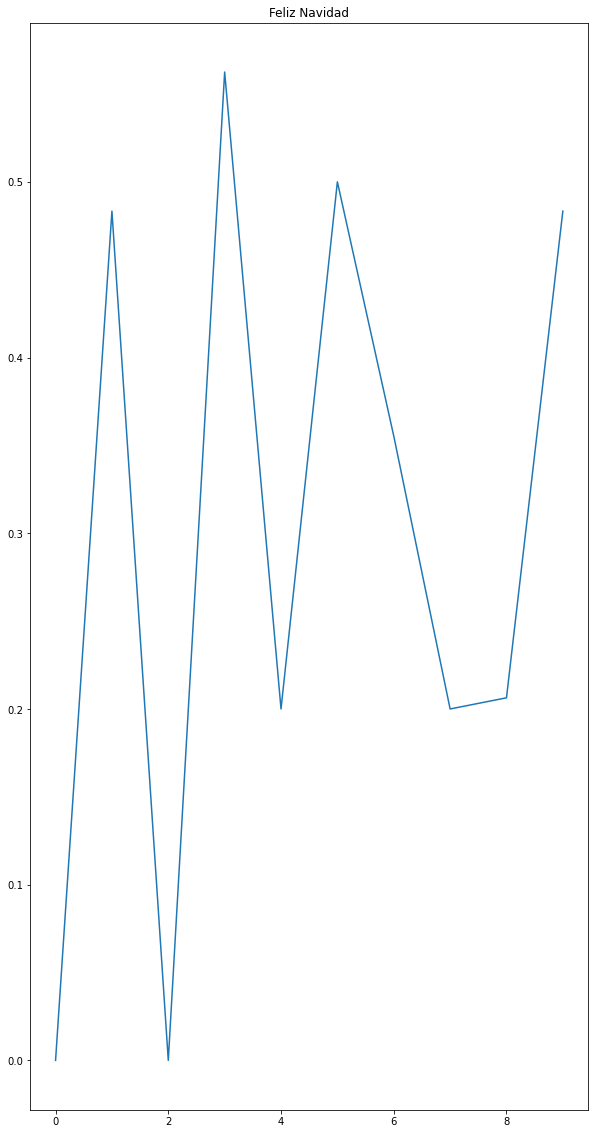

In [12]:
# Show the plot for one song
plt.plot(polarity_transcript[0])
plt.title(data['artists'].index[3])
plt.show()

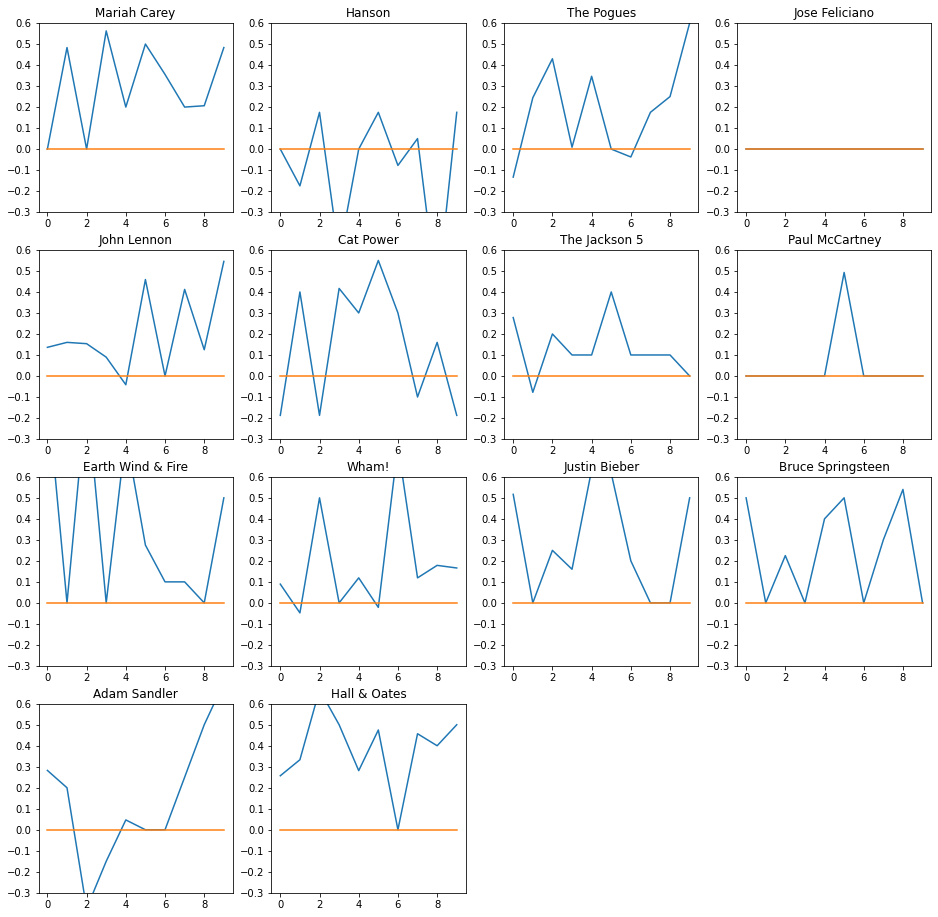

In [18]:
# Show the plot for all songs
plt.rcParams['figure.figsize'] = [16, 16]

for index, songs in enumerate(data.index):    
    plt.subplot(4, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['artists'][index])
    plt.ylim(ymin=-.3, ymax=.6)
    
plt.show()

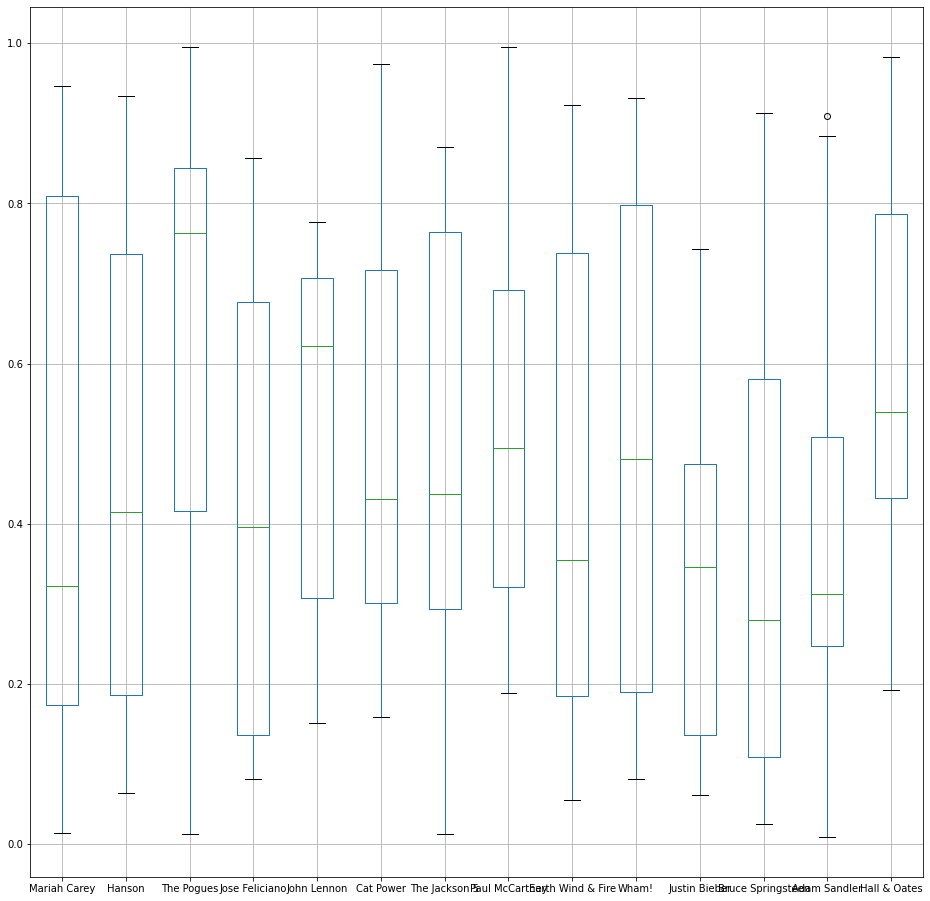

In [14]:
#let's plot this in Box visualizatiom
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.rand(10, 14), columns=['Mariah Carey', 'Hanson', 'The Pogues', 'Jose Feliciano', 'John Lennon', 'Cat Power', 'The Jackson 5', 'Paul McCartney', 'Earth Wind & Fire', 'Wham!', 'Justin Bieber', 'Bruce Springsteen', 'Adam Sandler', 'Hall & Oates'])
df.plot.box(grid='True')

In [15]:
df.head()

,Mariah Carey,Hanson,The Pogues,Jose Feliciano,John Lennon,Cat Power,The Jackson 5,Paul McCartney,Earth Wind & Fire,Wham!,Justin Bieber,Bruce Springsteen,Adam Sandler,Hall & Oates
0,0.387000,0.178878,0.966546,0.267063,0.577543,0.192305,0.266820,0.993782,0.054973,0.429678,0.423071,0.404999,0.008633,0.983480
1,0.171231,0.765860,0.397880,0.856558,0.380188,0.270738,0.871099,0.236496,0.922871,0.758712,0.061523,0.719534,0.884476,0.509573
2,0.946780,0.063322,0.311061,0.847044,0.763344,0.710111,0.772098,0.995005,0.806064,0.531594,0.627057,0.025366,0.229080,0.807548
3,0.183057,0.788850,0.816104,0.698711,0.708758,0.974748,0.417886,0.516142,0.788689,0.353784,0.078716,0.323774,0.129535,0.559062
4,0.013894,0.206872,0.789498,0.609957,0.665469,0.403771,0.012776,0.346780,0.085903,0.810895,0.212831,0.236192,0.304499,0.241226


Text(0.5, 0, '<-- Negative -------- Positive -->')

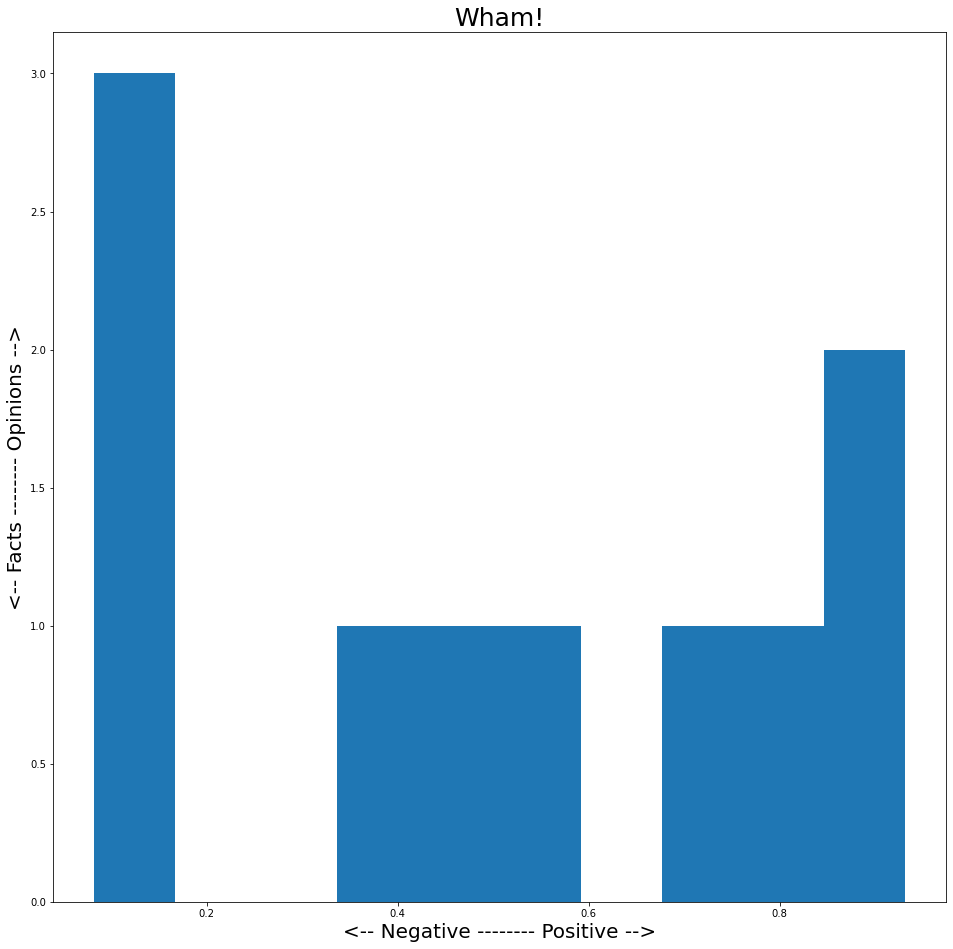

In [16]:
#plotting hanson
plt.hist(df['Wham!'])

plt.title('Wham!', fontsize=25)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=20)

In [51]:
print('SENTIMENT ANALYSIS, DONE!')
print('BY : BENEDICTO')

SENTIMENT ANALYSIS, DONE!
BY : BENEDICTO


In [21]:
print(' ===================================================== E N D =======================================================')

 ===================================================== E N D =======================================================
